## Missing Value Imputation Using Scikit-Learn
### Missing value Imputation:
#### - Numarical Variables
#### - Categorical Variables
### Different Strategy for Different Variabled Using
#### -  Simplelmputer
#### -  Pipeline
#### -  Column Transformer

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print("train shappe" , train.shape)
print("train shappe" , test.shape)

train shappe (1460, 81)
train shappe (1459, 80)


In [5]:
X_train= train.drop(columns="SalePrice", axis=1)
y_train= train["SalePrice"]
X_test= test.copy()

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test : ", X_test.shape)

Shape of X_train:  (1460, 80)
Shape of y_train:  (1460,)
Shape of X_test :  (1459, 80)


In [72]:
train1 = X_train.copy()
train1.shape

(1460, 80)

### Missing Value imputation

In [7]:
isnull_sum = X_train.isnull().sum()
isnull_sum

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 80, dtype: int64

In [9]:
num_vars = X_train.select_dtypes(include=["int64", "float64"]).columns
num_vars_miss = [var for var in num_vars if isnull_sum[var]>0]
num_vars_miss

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [10]:
cat_vars = X_train.select_dtypes(include=["O"]).columns
cat_vars_miss = [var for var in cat_vars if isnull_sum[var]>0]
cat_vars_miss

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [11]:
num_var_mean = ["LotFrontage"]
num_var_median = ['MasVnrArea', 'GarageYrBlt']
cat_vars_mode = ['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu']
cat_var_missing = ['GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature'] 

In [28]:
num_var_mean_imputer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])
num_var_median_imputer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])
cat_var_mode_imputer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent"))])
cat_var_missing_imputer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value="missing"))])


In [17]:
# preprocessor = ColumnTransformer(transformers=[("mean_imputer", num_var_mean_imputer,num_var_mean ),
#                                ("median_imputer", num_var_median_imputer, num_var_median), 
#                                ("mode_imputer", num_var_mode_imputer,cat_vars_mode ),
#                                ("missing_imputer",cat_var_missing,num_var_missing_imputer  )])

In [50]:
preprocessor = ColumnTransformer(
    transformers=[
        ("mean_imputer", num_var_mean_imputer, num_var_mean),
        ("median_imputer", num_var_median_imputer, num_var_median),
        ("mode_imputer", cat_var_mode_imputer, cat_vars_mode),
        ("missing_imputer", cat_var_missing_imputer, cat_var_missing)
    ],
#     remainder="passthrough"  # keep other columns unchanged
)


In [51]:
preprocessor

ColumnTransformer(transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['MasVnrArea', 'GarageYrBlt']),
                                ('mode_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Electrical',
                                  'FireplaceQu']),
                                ('missing_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant'))]),
                                 ['GarageType', 'GarageFinish', 'GarageQual',
                                  'GarageCond', 'PoolQC', 'Fence',
                                  'MiscFeature'])])

In [52]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['MasVnrArea', 'GarageYrBlt']),
                                ('mode_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Electrical',
                                  'FireplaceQu']),
                                ('missing_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant'))]),
                                 ['GarageType', 'GarageFinish', 'GarageQual',
                                  'GarageCond', 'PoolQC', 'Fence',
                                  'MiscFeature'])])

In [53]:
preprocessor.transform

<bound method ColumnTransformer.transform of ColumnTransformer(transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['MasVnrArea', 'GarageYrBlt']),
                                ('mode_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Electrical',
                                  'FireplaceQu']),
                                ('missing_im

In [54]:
# check mean value

preprocessor.named_transformers_["mean_imputer"].named_steps["imputer"].statistics_

array([70.04995837])

In [55]:
train['LotFrontage'].mean()

70.04995836802665

In [56]:
preprocessor.named_transformers_["mode_imputer"].named_steps["imputer"].statistics_

array(['Grvl', 'BrkFace', 'TA', 'TA', 'No', 'Unf', 'Unf', 'SBrkr', 'Gd'],
      dtype=object)

In [57]:
X_train_clean = preprocessor.transform(X_train)
X_test_clean = preprocessor.transform(X_test)

In [58]:
X_train_clean

array([[65.0, 196.0, 2003.0, ..., 'missing', 'missing', 'missing'],
       [80.0, 0.0, 1976.0, ..., 'missing', 'missing', 'missing'],
       [68.0, 162.0, 2001.0, ..., 'missing', 'missing', 'missing'],
       ...,
       [66.0, 0.0, 1941.0, ..., 'missing', 'GdPrv', 'Shed'],
       [68.0, 0.0, 1950.0, ..., 'missing', 'missing', 'missing'],
       [75.0, 0.0, 1965.0, ..., 'missing', 'missing', 'missing']],
      dtype=object)

In [59]:
# 
preprocessor.transformers_

[('mean_imputer',
  Pipeline(steps=[('imputer', SimpleImputer())]),
  ['LotFrontage']),
 ('median_imputer',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))]),
  ['MasVnrArea', 'GarageYrBlt']),
 ('mode_imputer',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))]),
  ['Alley',
   'MasVnrType',
   'BsmtQual',
   'BsmtCond',
   'BsmtExposure',
   'BsmtFinType1',
   'BsmtFinType2',
   'Electrical',
   'FireplaceQu']),
 ('missing_imputer',
  Pipeline(steps=[('imputer',
                   SimpleImputer(fill_value='missing', strategy='constant'))]),
  ['GarageType',
   'GarageFinish',
   'GarageQual',
   'GarageCond',
   'PoolQC',
   'Fence',
   'MiscFeature']),
 ('remainder',
  'drop',
  [0,
   1,
   2,
   4,
   5,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   27,
   28,
   29,
   34,
   36,
   37,
   38,
   39,
   40,
   41,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   

In [60]:
X_train_clean_miss_var = pd.DataFrame(X_train_clean, columns=num_var_mean+num_var_median+cat_vars_mode+cat_var_missing)

In [61]:
X_train_clean_miss_var.head()

,LotFrontage,MasVnrArea,GarageYrBlt,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,196.0,2003.0,Grvl,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,missing,missing,missing
1,80.0,0.0,1976.0,Grvl,BrkFace,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,missing,missing,missing
2,68.0,162.0,2001.0,Grvl,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,missing,missing,missing
3,60.0,0.0,1998.0,Grvl,BrkFace,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,missing,missing,missing
4,84.0,350.0,2000.0,Grvl,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,missing,missing,missing


In [62]:
X_train_clean_miss_var.shape

(1460, 19)

In [63]:
X_train_clean_miss_var.isnull().sum().sum()

0

In [65]:
train['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [66]:
X_train_clean_miss_var['Alley'].value_counts()

Alley
Grvl    1419
Pave      41
Name: count, dtype: int64

In [70]:
X_train_clean_miss_var['MiscFeature'].value_counts()

MiscFeature
missing    1406
Shed         49
Gar2          2
Othr          2
TenC          1
Name: count, dtype: int64

In [69]:
train['MiscFeature'].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

<Axes: >

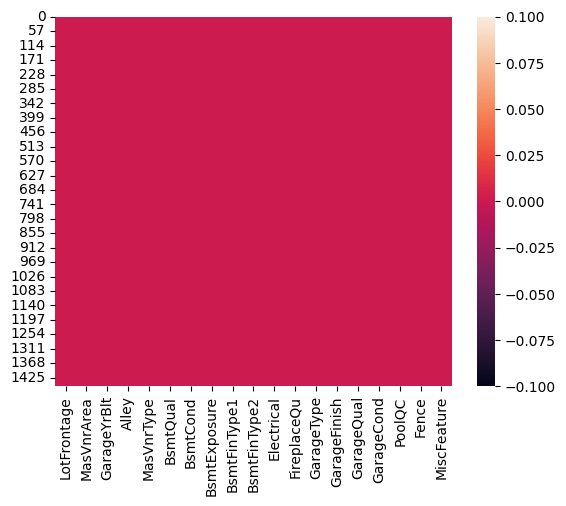

In [76]:
sns.heatmap(X_train_clean_miss_var.isnull())

In [77]:
train1.update(X_train_clean_miss_var)

In [78]:
X_train_clean_miss_var.shape

(1460, 19)

In [79]:
train1.shape

(1460, 80)

<Axes: >

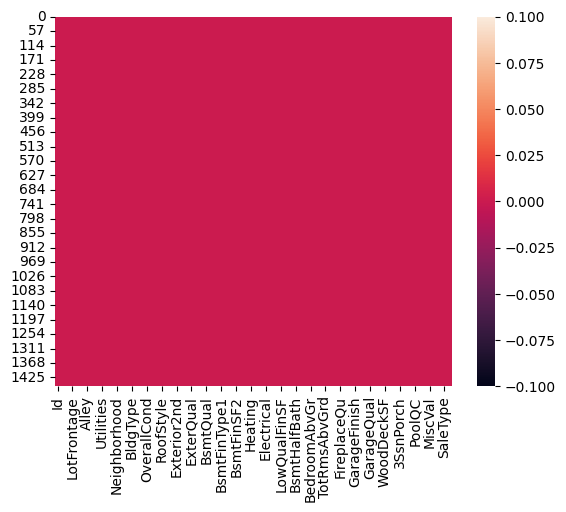

In [80]:
sns.heatmap(train1.isnull())

<Axes: >

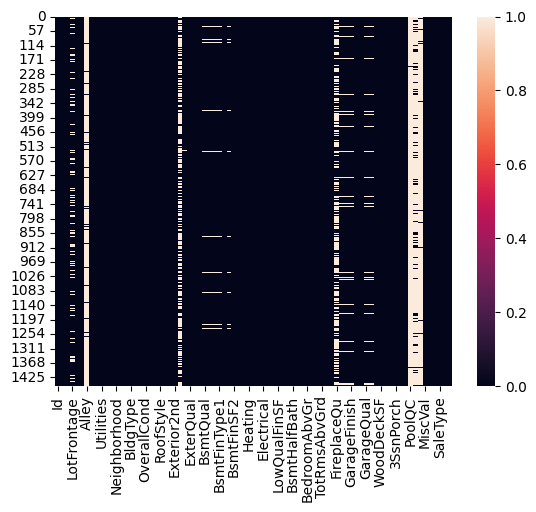

In [81]:
sns.heatmap(train.isnull())
